# Weighted Graphs

## Abstract

A weighted graph is a graph whith a number over each edge. In weighted graphs, the transit from one node to another is not uniform as in unweighted graphs. Therefore, in weighted graphs it is important the weights of edges.<br>
In this notebook you can find some aplication of weighted graphs: the short path between two nodes using Dijkstra's algorithm and the minimum spanning tree using Prim's algorithm. Both implementation were made using Networkx library.

## 1. Preparing the graph

### 1.1. Introduction

A simple graph is used in order to show this example. The data of the graph is imported from a csv file previously done. It consists of a list of local airports and some conections. The attribute (weight) used is the distance. 

### 1.2. Libraries

In [19]:
# Libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import time

### 1.3. The weighted graph

In [20]:
# Importing nodes and edges from csv files
dfNodes = pd.read_csv('files/airports_arg_nodes.csv',sep=';')
dfEdges = pd.read_csv('files/airports_arg_edges.csv',sep=';')
G1 = nx.Graph()
for i in range (len(dfNodes)):
    G1.add_node(dfNodes.iloc[i,0])
G1 = nx.from_pandas_edgelist(dfEdges, source='source', target='target', edge_attr='weight', create_using=nx.Graph())

In [21]:
# Presenting a Dataframe with the data of the graph
df1=nx.to_pandas_edgelist(G1)
print(df1)

   source target  weight
0     ROS    MDQ     700
1     ROS    AEP     300
2     ROS    COR     400
3     ROS    TUC     800
4     ROS    CNQ     720
5     MDQ    AEP     400
6     MDQ    COR    1100
7     MDQ    MDZ    1350
8     MDQ    CNQ    1300
9     AEP    MDZ    1050
10    AEP    COR     700
11    AEP    TUC    1250
12    AEP    CNQ     920
13    MDZ    COR     450
14    MDZ    TUC     950
15    COR    TUC     570
16    COR    CNQ     850
17    TUC    CNQ     800


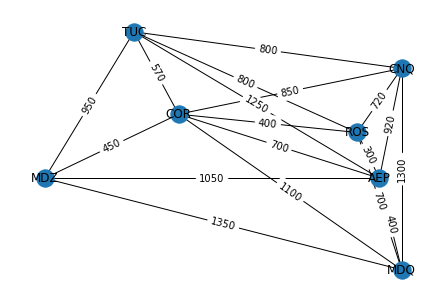

In [22]:
# importing position of nodes
pos=dfNodes.set_index('node').T.to_dict('list')
# Drawing the graph
nx.draw(G1,pos,with_labels = True)
edge_labels=nx.get_edge_attributes(G1,'weight')
nx.draw_networkx_edge_labels(G1,pos,edge_labels)
plt.show()

## 2. Shortest path: Dijkstra's algorithm

### 2.1. Presentation:

Dijkstra's algorithm is the most efficient algorithm to get the shortest path between two nodes in a weighted graph. Therefore, the weighted graph, the start and the end node have to be given.

### 2.2. Dijkstra's implementation in Networkx

In [23]:
# Input start and end nodes:
start,end=input("Input starting and finish nodes separated by a space:").split()

Input starting and finish nodes separated by a space:ROS MDZ


In [24]:
# Shortest path and distance:
path=nx.dijkstra_path(G1, source=start, target=end)
print('Shortest Path between nodes {0} and {1}:'.format(start,end), path)
distance=nx.dijkstra_path_length(G1, source=start, target=end)
print('The distance from node {0} and {1} is:'.format(start,end), distance)

Shortest Path between nodes ROS and MDZ: ['ROS', 'COR', 'MDZ']
The distance from node ROS and MDZ is: 850


### 2.3. Drawing the Dijkstra Shortest Path

In [25]:
# Add nodes of the graph
G2=nx.Graph() 
for i in range (len(dfNodes)):
    G2.add_node(dfNodes.iloc[i,0])
# Add the edges of the Dijkstra Shortest Path (DSP)
# The first line of the edges list of the DSP
source_0=path[0]
target_0=path[1]
for i in range(len(dfEdges)):
    if((dfEdges.iloc[i,0] == source_0) & (dfEdges.iloc[i,1] == target_0)or(dfEdges.iloc[i,1] == source_0) & (dfEdges.iloc[i,0] == target_0)):
        weight_0=dfEdges.iloc[i,3]
        break
dsp_edges = [ (source_0, target_0, weight_0 )]
df_DSP = pd.DataFrame(dsp_edges, columns = ['source' , 'target', 'weight'])
# Inserting the rest of the edges of the DSP
for i in range(1,len(path)-1):
    source_i=path[i]
    target_i=path[i+1]
    longitud=len(df_DSP)
    for j in range(len(dfEdges)):
        if((dfEdges.iloc[j,0] == source_i) & (dfEdges.iloc[j,1] == target_i)or(dfEdges.iloc[j,1] == source_i) & (dfEdges.iloc[j,0] == target_i)):
            weight_i=dfEdges.iloc[j,3]
            break
    df_DSP.loc[longitud]=[ source_i, target_i, weight_i]
DSP = nx.from_pandas_edgelist(df_DSP, source='source', target='target', edge_attr='weight', create_using=nx.Graph())

{('ROS', 'COR'): Text(15.0, 19.0, '400'),
 ('COR', 'MDZ'): Text(8.0, 16.5, '680')}

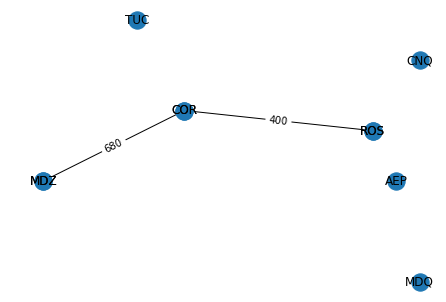

In [26]:
nx.draw(G2,pos,with_labels = True)
nx.draw(DSP,pos,with_labels = True)
nx.draw_networkx_edge_labels(DSP,pos,edge_labels=nx.get_edge_attributes(DSP,'weight'))

## 3. Minimum Spanning Tree: Prim's Algorithm 

### 3.1. Presentation:

Minimum Spanning Trees (MST) try to solve problems of efficience. Prim's algorithm is a very simple algorithm that permits to obtain the minimumm spaning tree : from a simple connected weighted graph it obtains the covering with the less weight from all the possible covering trees.

### 3.2. Implementation of Prim's Algorithm

In [27]:
from networkx.algorithms import tree
mst = tree.minimum_spanning_edges(G1, algorithm="prim", data=False)
edgelist = list(mst)
sortedEdgeList=sorted(sorted(e) for e in edgelist)
print('Edges of MST: ', sortedEdgeList)

Edges of MST:  [['AEP', 'MDQ'], ['AEP', 'ROS'], ['CNQ', 'ROS'], ['COR', 'MDZ'], ['COR', 'ROS'], ['COR', 'TUC']]


### 3.3. Drawing the Minimum Spanning Tree

#### Building the Minimum Spanning Tree

In [28]:
# Add nodes of the graph
MST=nx.Graph()
for i in range (len(dfNodes)):
    MST.add_node(dfNodes.iloc[i,0])
# Add edges of the MST
# The first line of the edges list of the MST
source_0=sortedEdgeList[0][0]
target_0=sortedEdgeList[0][1]
for i in range(len(dfEdges)):
    if((dfEdges.iloc[i,0] == source_0) & (dfEdges.iloc[i,1] == target_0)or(dfEdges.iloc[i,1] == source_0) & (dfEdges.iloc[i,0] == target_0)):
        weight_0=dfEdges.iloc[i,3]
        break
mst_edges = [ (source_0, target_0, weight_0 )]
df_MST = pd.DataFrame(mst_edges, columns = ['source' , 'target', 'weight'])
# Inserting the rest of the edges of the MST
for i in range(1,len(sortedEdgeList)):
    source_i=sortedEdgeList[i][0]
    target_i=sortedEdgeList[i][1]
    longitud=len(df_MST)
    for j in range(len(dfEdges)):
        if((dfEdges.iloc[j,0] == source_i) & (dfEdges.iloc[j,1] == target_i)or(dfEdges.iloc[j,1] == source_i) & (dfEdges.iloc[j,0] == target_i)):
            weight_i=dfEdges.iloc[j,3]
            break
    df_MST.loc[longitud]=[ source_i, target_i, weight_i]
MST = nx.from_pandas_edgelist(df_MST, source='source', target='target', edge_attr='weight', create_using=nx.Graph())

#### Drawing the Minimum Spanning Tree

{('AEP', 'MDQ'): Text(20.5, 8.0, '400'),
 ('AEP', 'ROS'): Text(19.5, 15.5, '300'),
 ('ROS', 'CNQ'): Text(20.0, 21.5, '720'),
 ('ROS', 'COR'): Text(15.0, 19.0, '400'),
 ('COR', 'MDZ'): Text(8.0, 16.5, '680'),
 ('COR', 'TUC'): Text(10.0, 24.5, '570')}

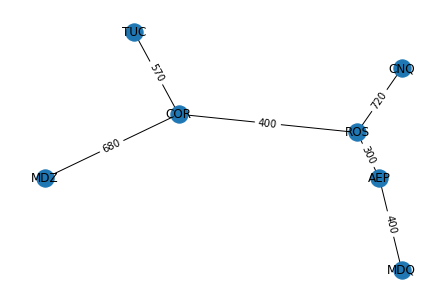

In [29]:
nx.draw(MST,pos,with_labels = True)
nx.draw_networkx_edge_labels(MST,pos,edge_labels=nx.get_edge_attributes(MST,'weight'))